In [1]:
import pandas as pd

import numpy as np

import seaborn as sns 

from matplotlib import pyplot as plt

from sklearn.impute import SimpleImputer 

from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , MinMaxScaler , StandardScaler , LabelEncoder 

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest , chi2

from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor

from sklearn.linear_model import LogisticRegression , LinearRegression, Ridge, Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVC , SVR

from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor , GradientBoostingRegressor

from sklearn.pipeline import Pipeline , make_pipeline

from sklearn.metrics import accuracy_score , classification_report

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

from sklearn.pipeline import Pipeline , make_pipeline

from sklearn.metrics import accuracy_score

import warnings 

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\DATA SCIENCE\retail_store_inventory.csv')

In [3]:
data.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [4]:
data.tail()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring
73099,2024-01-01,S005,P0020,Groceries,East,117,6,165,2.33,78.39,20,Rainy,1,79.52,Spring


In [5]:
data.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [7]:
data.shape

(73100, 15)

In [8]:
data.sample()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
27947,2022-10-07,S003,P0008,Furniture,West,113,104,200,95.55,95.61,20,Cloudy,1,95.69,Spring


In [9]:
data.drop(['Store ID', 'Product ID'], axis=1, inplace=True)


In [10]:
data.sample()

,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
49602,2023-05-12,Furniture,West,190,9,90,23.96,12.37,20,Cloudy,0,10.38,Spring


In [11]:
data['Date'] = pd.to_datetime(data['Date'])


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Category            73100 non-null  object        
 2   Region              73100 non-null  object        
 3   Inventory Level     73100 non-null  int64         
 4   Units Sold          73100 non-null  int64         
 5   Units Ordered       73100 non-null  int64         
 6   Demand Forecast     73100 non-null  float64       
 7   Price               73100 non-null  float64       
 8   Discount            73100 non-null  int64         
 9   Weather Condition   73100 non-null  object        
 10  Holiday/Promotion   73100 non-null  int64         
 11  Competitor Pricing  73100 non-null  float64       
 12  Seasonality         73100 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(5), ob

In [13]:
data['year'] = data['Date'].dt.year
data['month_no'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [14]:
data.sample()

,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,year,month_no,day
54223,2023-06-27,Electronics,East,288,121,31,115.35,22.9,15,Rainy,1,18.18,Spring,2023,6,27


<Axes: xlabel='Inventory Level'>

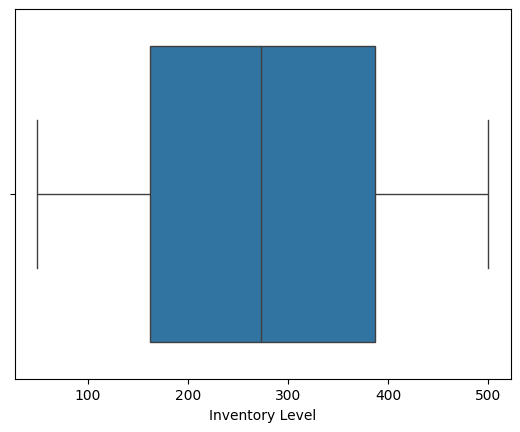

In [15]:
sns.boxplot(x = data['Inventory Level'])


<Axes: xlabel='Units Sold'>

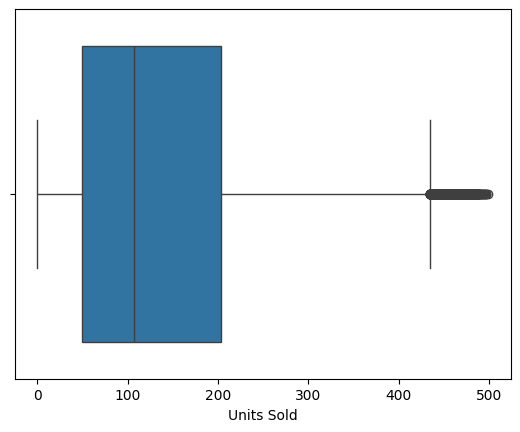

In [16]:
sns.boxplot(x = data['Units Sold'])


<Axes: xlabel='Units Ordered'>

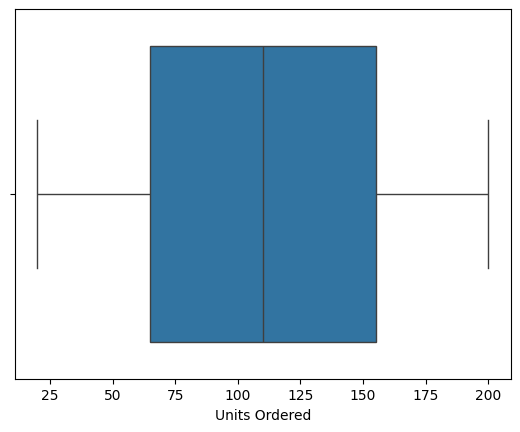

In [17]:
sns.boxplot(x = data['Units Ordered'])


<Axes: xlabel='Demand Forecast'>

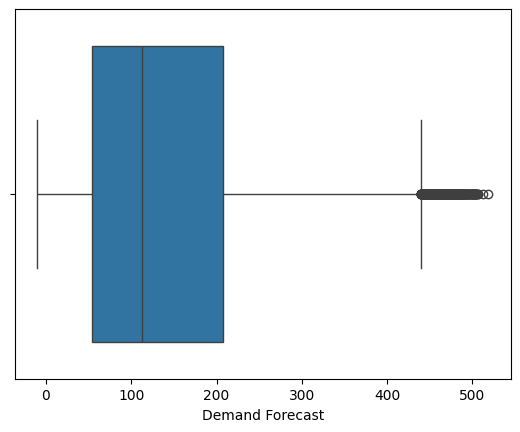

In [18]:
sns.boxplot(x = data['Demand Forecast'])


<Axes: xlabel='Price'>

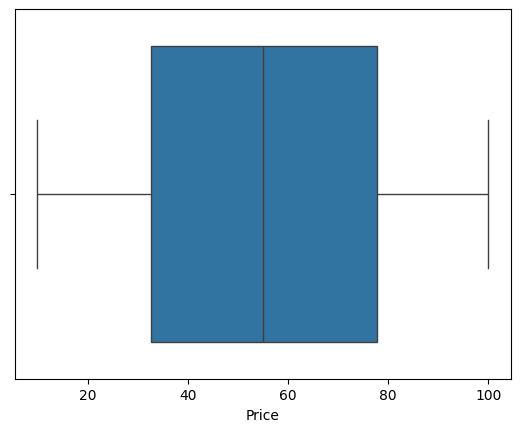

In [19]:
sns.boxplot(x = data['Price'])


<Axes: xlabel='Discount'>

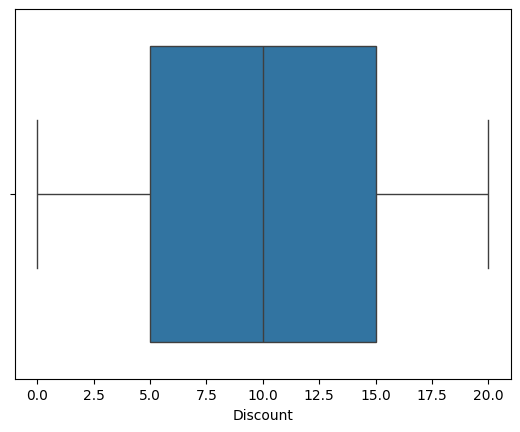

In [20]:
sns.boxplot(x = data['Discount'])


<Axes: xlabel='Competitor Pricing'>

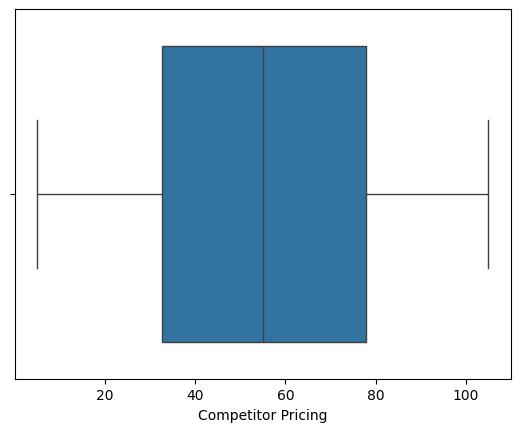

In [21]:
sns.boxplot(x = data['Competitor Pricing'])


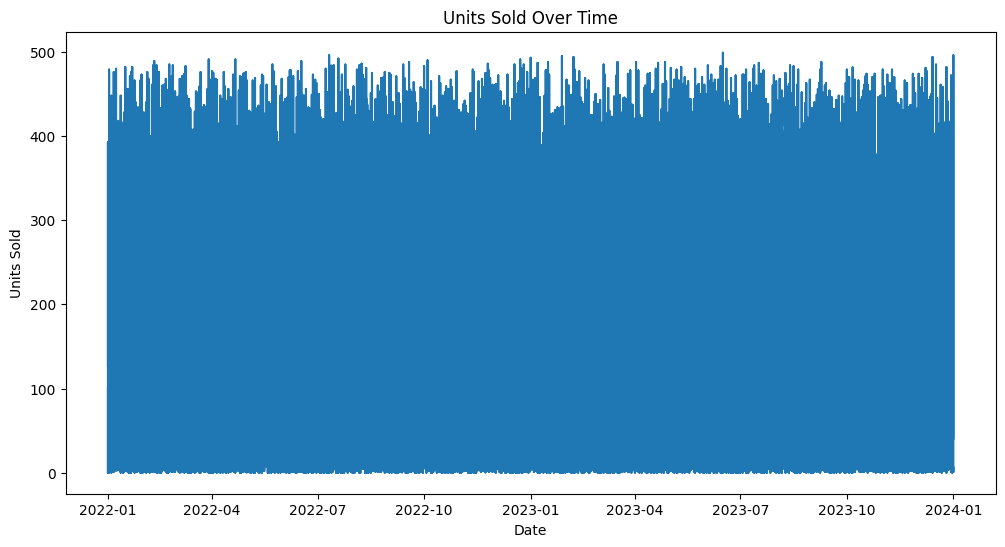

In [22]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Units Sold'])
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

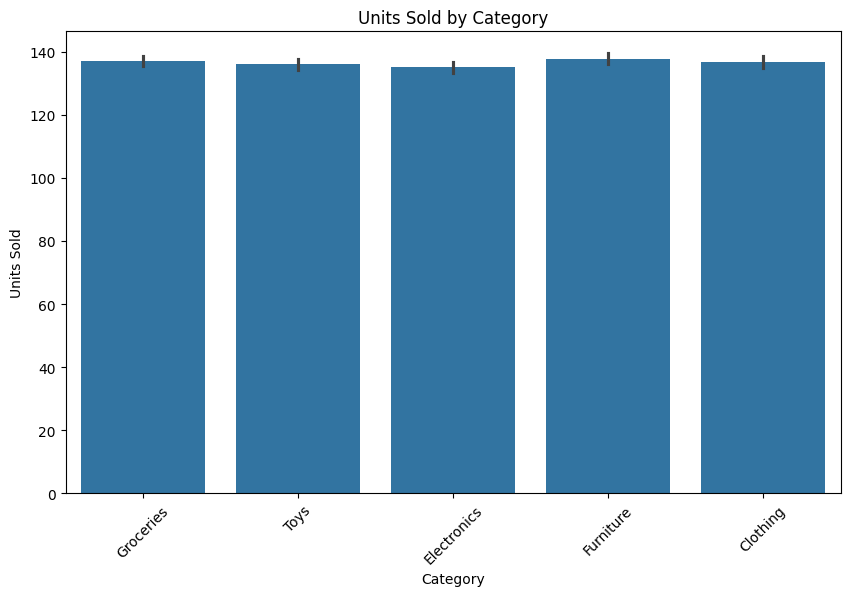

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Units Sold', data=data)
plt.title('Units Sold by Category')
plt.xticks(rotation=45)
plt.show()

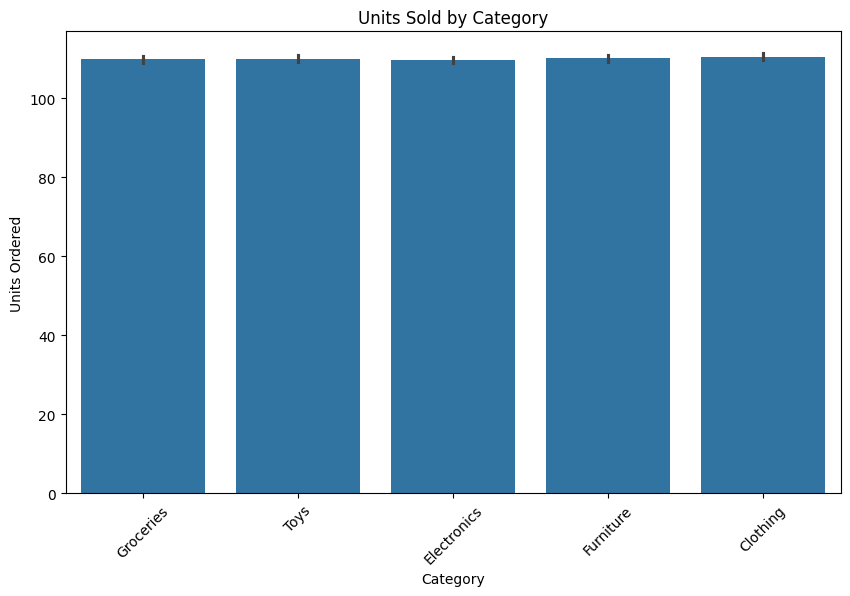

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Units Ordered', data=data)
plt.title('Units Sold by Category')
plt.xticks(rotation=45)
plt.show()

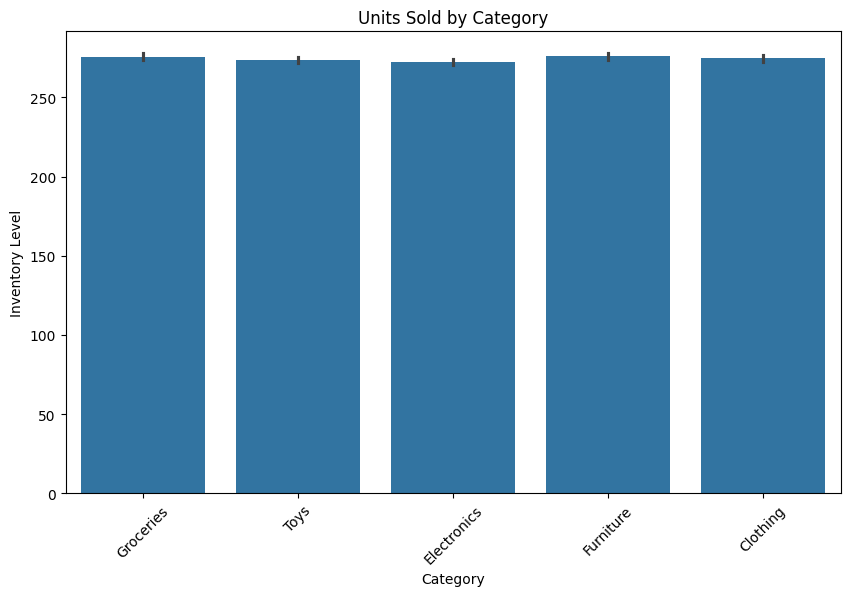

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Inventory Level', data=data)
plt.title('Units Sold by Category')
plt.xticks(rotation=45)
plt.show()

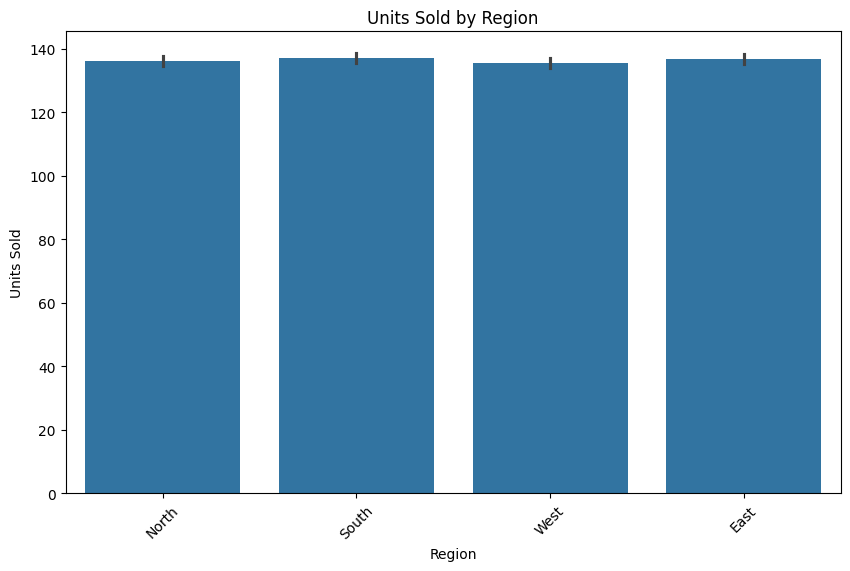

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Units Sold', data=data)
plt.title('Units Sold by Region')
plt.xticks(rotation=45)
plt.show()

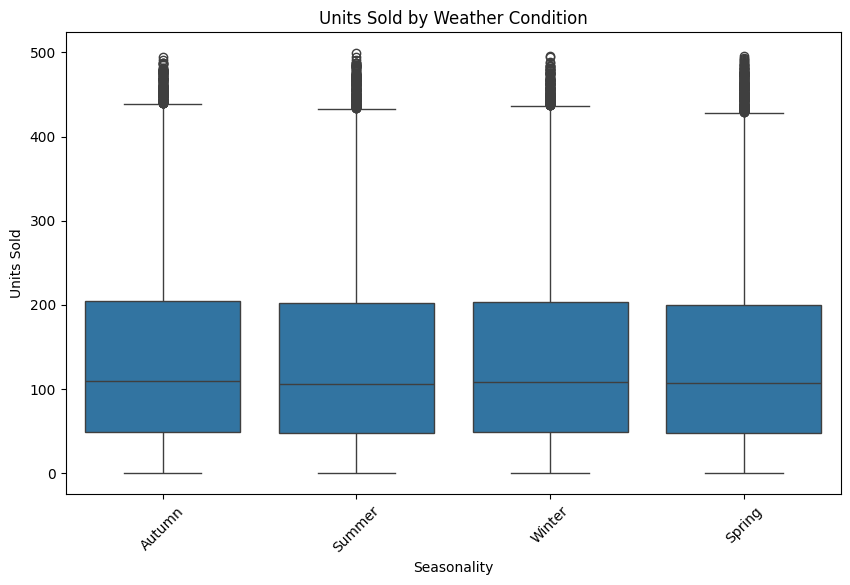

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Seasonality', y='Units Sold', data=data)
plt.title('Units Sold by Weather Condition')
plt.xticks(rotation=45)
plt.show()

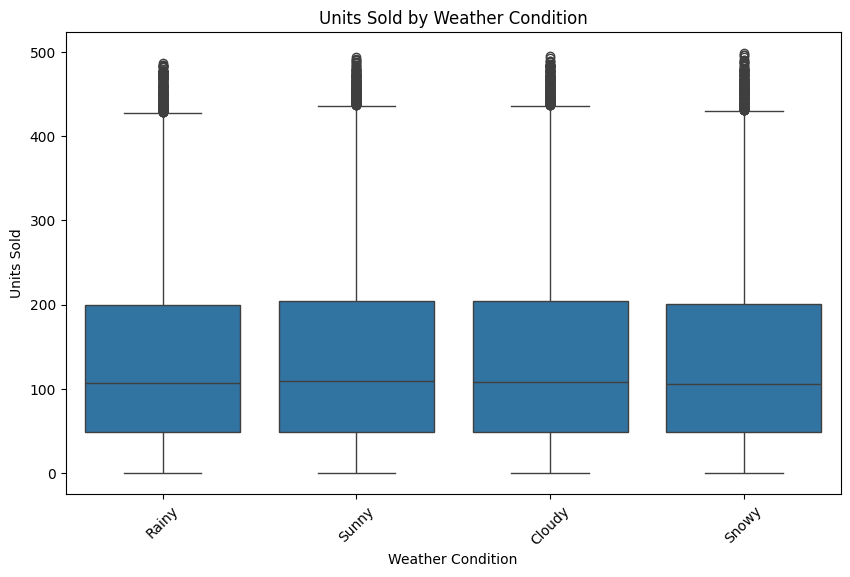

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Weather Condition', y='Units Sold', data=data)
plt.title('Units Sold by Weather Condition')
plt.xticks(rotation=45)
plt.show()

In [29]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
datetime_cols = data.select_dtypes(include=['datetime']).columns.tolist()


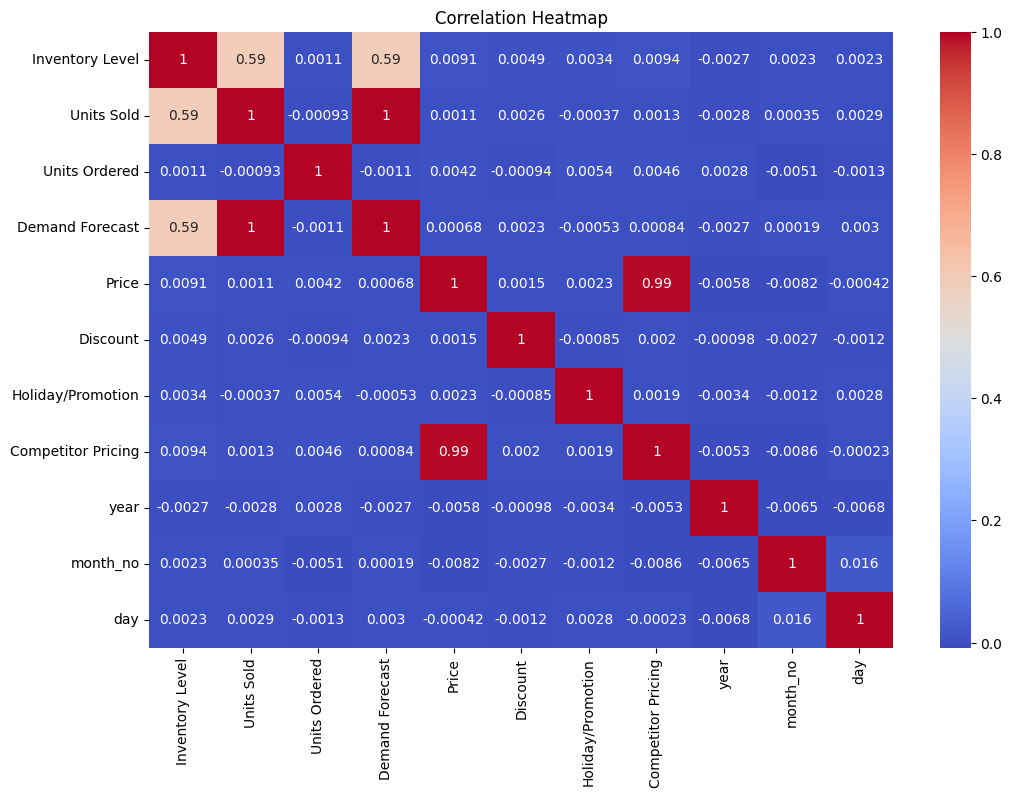

In [30]:
numerical_data = data[numerical_cols]

plt.figure(figsize=(12,8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [31]:
categorical_cols

['Category', 'Region', 'Weather Condition', 'Seasonality']

In [32]:
data['Category'].unique()

array(['Groceries', 'Toys', 'Electronics', 'Furniture', 'Clothing'],
      dtype=object)

In [33]:
data['Region'].unique()

array(['North', 'South', 'West', 'East'], dtype=object)

In [34]:
data['Weather Condition'].unique()

array(['Rainy', 'Sunny', 'Cloudy', 'Snowy'], dtype=object)

In [35]:
data['Seasonality'].unique()

array(['Autumn', 'Summer', 'Winter', 'Spring'], dtype=object)

In [36]:
# data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [37]:
# data_encoded

In [38]:
# Initialize OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform categorical data
encoded_array = ohe.fit_transform(data[categorical_cols])

# Get feature names for encoded columns
encoded_cols = ohe.get_feature_names_out(categorical_cols)

# Create DataFrame from encoded array
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=data.index)


In [39]:
# Drop original categorical columns
data_noncategorical = data.drop(columns=categorical_cols)

# Concatenate the encoded columns with non-categorical data
data_encoded = pd.concat([data_noncategorical, encoded_df], axis=1)



In [40]:
data_encoded.head()

,Date,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing,year,...,Category_Toys,Region_North,Region_South,Region_West,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,2022-01-01,231,127,55,135.47,33.50,20,0,29.69,2022,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-01,204,150,66,144.04,63.01,20,0,66.16,2022,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2022-01-01,102,65,51,74.02,27.99,10,1,31.32,2022,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2022-01-01,469,61,164,62.18,32.72,10,1,34.74,2022,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-01,166,14,135,9.26,73.64,0,0,68.95,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [41]:
X = data_encoded.drop(columns=['Demand Forecast' , 'Date'])
y = data_encoded['Demand Forecast']


In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
X_train.shape

(58480, 23)

In [44]:
X_test.shape

(14620, 23)

In [45]:
y_train.shape

(58480,)

In [46]:
y_test.shape

(14620,)

In [47]:
numerical_cols.remove('Demand Forecast')


In [48]:
scaler = StandardScaler()
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled_numerical = scaler.transform(X_test[numerical_cols])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Category            73100 non-null  object        
 2   Region              73100 non-null  object        
 3   Inventory Level     73100 non-null  int64         
 4   Units Sold          73100 non-null  int64         
 5   Units Ordered       73100 non-null  int64         
 6   Demand Forecast     73100 non-null  float64       
 7   Price               73100 non-null  float64       
 8   Discount            73100 non-null  int64         
 9   Weather Condition   73100 non-null  object        
 10  Holiday/Promotion   73100 non-null  int64         
 11  Competitor Pricing  73100 non-null  float64       
 12  Seasonality         73100 non-null  object        
 13  year                73100 non-null  int32     

In [50]:
clf_rf = RandomForestRegressor(random_state=100)
clf_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=100)

In [51]:
rf_pred=clf_rf.predict(X_test)

In [52]:
mae = mean_absolute_error(y_test, rf_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 7.601438645690834


In [53]:
mse = mean_squared_error(y_test, rf_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 78.82145971734337


In [54]:
rmse = mean_squared_error(y_test, rf_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 8.878145060616175


In [55]:
r2 = r2_score(y_test, rf_pred)
print("R² Score:", r2)

R² Score: 0.993387667455422


In [56]:
print("📊 Regression Report:")
print("=====================")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

📊 Regression Report:
Mean Absolute Error (MAE): 7.6014
Mean Squared Error (MSE): 78.8215
Root Mean Squared Error (RMSE): 8.8781
R² Score: 0.9934


In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [58]:
lr_pred=lr.predict(X_test)

In [66]:
lr_mae = mean_absolute_error(y_test, lr_pred)
print("Mean Absolute Error (MAE):", lr_mae)

Mean Absolute Error (MAE): 7.471852743891112


In [67]:
lr_mse = mean_squared_error(y_test, lr_pred)
print("Mean Squared Error (MSE):", lr_mse)

Mean Squared Error (MSE): 74.80159942450899


In [68]:
lr_rmse = mean_squared_error(y_test, lr_pred, squared=False)
print("Root Mean Squared Error (RMSE):", lr_rmse)

Root Mean Squared Error (RMSE): 8.648791789869206


In [69]:
lr_r2 = r2_score(y_test, lr_pred)
print("R² Score:", lr_r2)

R² Score: 0.9937248935501212


In [70]:
print("📊 Regression Report:")
print("=====================")
print(f"Mean Absolute Error (MAE): {lr_mae:.4f}")
print(f"Mean Squared Error (MSE): {lr_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse:.4f}")
print(f"R² Score: {lr_r2:.4f}")

📊 Regression Report:
Mean Absolute Error (MAE): 7.4719
Mean Squared Error (MSE): 74.8016
Root Mean Squared Error (RMSE): 8.6488
R² Score: 0.9937


In [64]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² Score (Train): {r2_train:.4f}")
print(f"R² Score (Test): {r2_test:.4f}")

R² Score (Train): 0.9937
R² Score (Test): 0.9937


In [65]:
gb =  GradientBoostingRegressor()
gb.fit(X_train, y_train)


GradientBoostingRegressor()

In [71]:
gb_pred=gb.predict(X_test)

In [72]:
gb_mae = mean_absolute_error(y_test, gb_pred)
print("Mean Absolute Error (MAE):", gb_mae)

Mean Absolute Error (MAE): 7.495177477942504


In [73]:
gb_mse = mean_squared_error(y_test, gb_pred)
print("Mean Squared Error (MSE):", gb_mse)

Mean Squared Error (MSE): 75.77029996467495


In [74]:
gb_rmse = mean_squared_error(y_test, gb_pred, squared=False)
print("Root Mean Squared Error (RMSE):", gb_rmse)

Root Mean Squared Error (RMSE): 8.70461371714305


In [75]:
gb_r2 = r2_score(y_test, gb_pred)
print("R² Score:", gb_r2)

R² Score: 0.9936436292582562


In [76]:
print("📊 Regression Report:")
print("=====================")
print(f"Mean Absolute Error (MAE): {gb_mae:.4f}")
print(f"Mean Squared Error (MSE): {gb_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {gb_rmse:.4f}")
print(f"R² Score: {gb_r2:.4f}")

📊 Regression Report:
Mean Absolute Error (MAE): 7.4952
Mean Squared Error (MSE): 75.7703
Root Mean Squared Error (RMSE): 8.7046
R² Score: 0.9936
